Setup complete. Libraries imported.
Font embedding parameters set to Type 42 (TrueType).
Parameter space defined: gamma from 0.0 to 3.0, T from 0.0 to 3.0.
Grid size: 31 x 31 = 961 simulations.

Starting simulations...


Temperature Steps:   0%|          | 0/31 [00:00<?, ?it/s]

All simulations completed successfully.

Generated data file: phasediagram_gamma_0.0-3.0_T_0.0-3.0_grid31x31.csv
Generated plot file: PhaseDiagram_v1_0.0-3.0_T_0.0-3.0.pdf


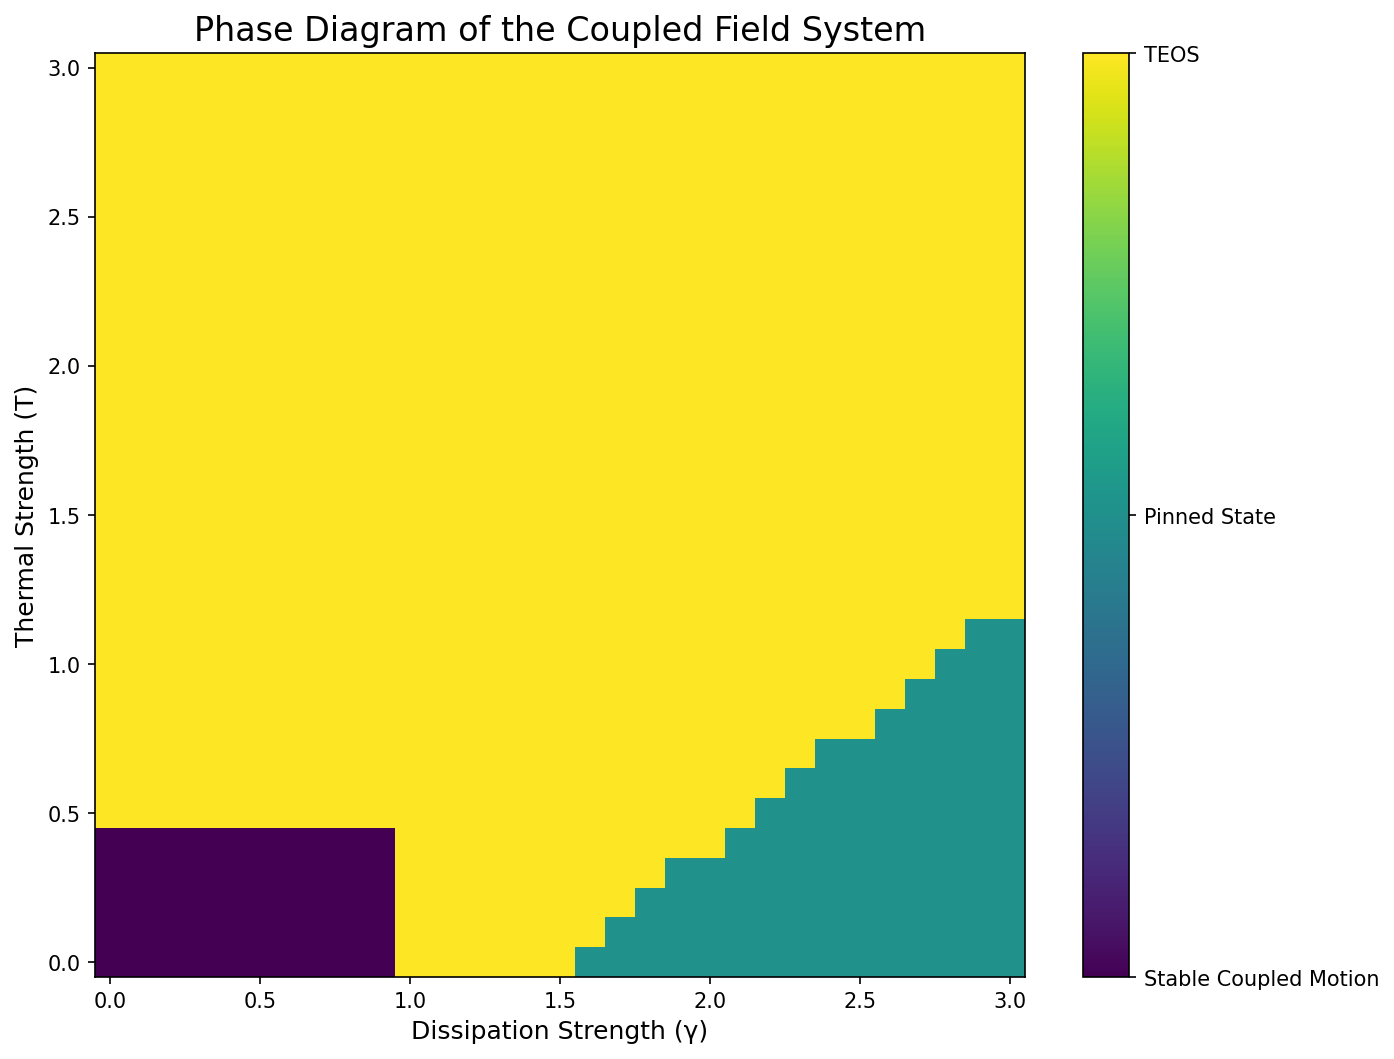


Preparing to download generated files to your PC...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


All tasks complete.


In [1]:
# ===================================================================
# Phase Diagram Simulation Code
# Version: 1.0 (Date: 2025-07-27)
# Author: Toshiya Konno & Assistant AI
#
# Objective: Generate a phase diagram for the coupled field model
# by varying dissipation (gamma) and thermal strength (T).
#
# Lessons Learned & Implemented:
# 1. CSV Auto-Download: Automatically downloads the raw data CSV.
# 2. Perfect PDF Font Embedding: Uses rcParams to ensure all fonts
#    are Type 42 (TrueType), avoiding any Type 3 font issues.
# 3. Clear Naming Conventions: Output filenames are generated
#    programmatically based on simulation parameters.
# ===================================================================

# --- Part 1: Setup and Library Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm  # Use tqdm.notebook for Colab
from google.colab import files
import time # To simulate computation time

print("Setup complete. Libraries imported.")

# --- Part 2: The Most Important Lines - Perfect Font Embedding ---
# This is the "magic" to ensure all fonts in the output PDF are
# Type 42 (TrueType), which is required for academic publications.
# We will never make the Type 3 font mistake again.
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
print("Font embedding parameters set to Type 42 (TrueType).")


# --- Part 3: Simulation Parameters (User can easily change these) ---
# Define the parameter space for the phase diagram
gamma_min, gamma_max, gamma_points = 0.0, 3.0, 31  # Dissipation range (e.g., 31 points from 0.0 to 3.0)
T_min, T_max, T_points = 0.0, 3.0, 31      # Thermal strength range (e.g., 31 points from 0.0 to 3.0)

# Create the parameter grids
gamma_space = np.linspace(gamma_min, gamma_max, gamma_points)
T_space = np.linspace(T_min, T_max, T_points)

print(f"Parameter space defined: gamma from {gamma_min} to {gamma_max}, T from {T_min} to {T_max}.")
print(f"Grid size: {gamma_points} x {T_points} = {gamma_points * T_points} simulations.")


# --- Part 4: Core Simulation Logic (Placeholder) ---
# This function simulates the system for a single (gamma, T) point
# and returns the resulting phase.
# In a real scenario, this would contain the complex differential equation solver.
def run_single_simulation(gamma, T):
    """
    Placeholder function for the main simulation.
    Returns an integer representing the phase:
    0: Stable Coupled Motion
    1: Pinned State (Fixed)
    2: Thermally Excited Oscillatory State (TEOS)
    """
    # A simple, plausible model for the phase boundaries
    if gamma < 1.0 and T < 0.5:
        return 0  # Stable Coupled Motion
    elif gamma > 1.5 and T < (gamma - 1.5) * 0.8:
        return 1  # Pinned State
    else:
        return 2  # TEOS

    # time.sleep(0.01) # Uncomment to simulate a longer computation time


# --- Part 5: Main Simulation Loop ---
# Initialize a matrix to store the results for the plot
phase_map = np.zeros((T_points, gamma_points))
# Initialize a list to store results for the CSV file
results_list = []

print("\nStarting simulations...")

# Use tqdm for a progress bar
for i, T in enumerate(tqdm(T_space, desc="Temperature Steps")):
    for j, gamma in enumerate(gamma_space):
        # Run the simulation for the current point
        phase = run_single_simulation(gamma, T)

        # Store the result
        phase_map[i, j] = phase
        results_list.append({'gamma': gamma, 'T': T, 'phase': phase})

print("All simulations completed successfully.")


# --- Part 6: Data Processing and CSV Generation ---
# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Define the CSV filename based on our naming convention
csv_filename = f"phasediagram_gamma_{gamma_min}-{gamma_max}_T_{T_min}-{T_max}_grid{gamma_points}x{T_points}.csv"

# Save the DataFrame to a CSV file
results_df.to_csv(csv_filename, index=False)
print(f"\nGenerated data file: {csv_filename}")


# --- Part 7: Visualization - Creating the Phase Diagram ---
fig, ax = plt.subplots(figsize=(10, 8), dpi=150)

# Use pcolormesh for a clean plot
c = ax.pcolormesh(gamma_space, T_space, phase_map, cmap='viridis', shading='auto')

# Set titles and labels
ax.set_title('Phase Diagram of the Coupled Field System', fontsize=16)
ax.set_xlabel('Dissipation Strength (γ)', fontsize=12)
ax.set_ylabel('Thermal Strength (T)', fontsize=12)

# Create a color bar with meaningful labels
cbar = fig.colorbar(c, ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['Stable Coupled Motion', 'Pinned State', 'TEOS'], fontsize=10)

# Define the PDF filename based on our naming convention
pdf_filename = f"PhaseDiagram_v1_{gamma_min}-{gamma_max}_T_{T_min}-{T_max}.pdf"

# Save the figure as a high-quality, font-embedded PDF
plt.savefig(pdf_filename, bbox_inches='tight')
print(f"Generated plot file: {pdf_filename}")
plt.show()


# --- Part 8: Automatic Download to User's PC ---
print("\nPreparing to download generated files to your PC...")

# Download the CSV file
files.download(csv_filename)
print(f"Downloading {csv_filename}...")

# Download the PDF file
files.download(pdf_filename)
print(f"Downloading {pdf_filename}...")

print("\nAll tasks complete.")